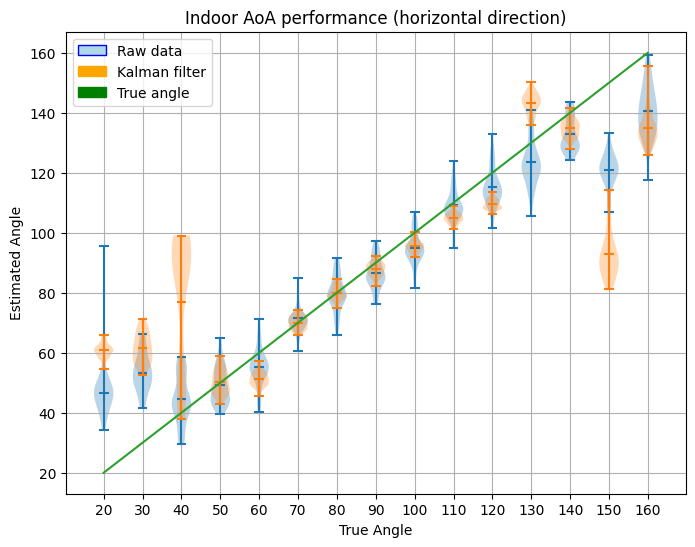

In [1]:
import numpy as np
import matplotlib.pyplot as plt

angle_list = [i for i in range(20,170,10)]

raw_angle_list = []
KF_angle_list = []

for angle in angle_list:
    raw_data = np.load('Indoor_experiment_result/raw_angle_{}.npy'.format(angle))
    raw_data = raw_data[50:]
    raw_angle_list.append(raw_data)
    KF_data = np.load('Indoor_experiment_result/KF_angle_{}.npy'.format(angle))
    KF_data = KF_data[50:]
    KF_angle_list.append(KF_data)


fig, ax = plt.subplots(figsize=(8, 6))

# 绘制 Violin Plot
ax.violinplot(raw_angle_list, showmeans=True)
ax.violinplot(KF_angle_list, showmeans=True)
# 设置坐标轴标签和标题
ax.set_xlabel('True Angle')
ax.set_ylabel('Estimated Angle')
ax.set_title('Indoor AoA performance (horizontal direction)')

# 设置 x 轴刻度标签
ax.set_xticks([i for i in range(1,16)])
ax.set_xticklabels([f'{i}' for i in angle_list])

ax.plot([i for i in range(1,16)], [i*10+10 for i in range(1,16)],label='True angle')

rect_1 = plt.Rectangle((0, 0), 1, 1, facecolor='lightblue', edgecolor='blue')
rect_2 = plt.Rectangle((0, 0), 1, 1, facecolor='orange', edgecolor='orange')
rect_3 = plt.Rectangle((0, 0), 1, 1, facecolor='g', edgecolor='g')
plt.legend([rect_1, rect_2,rect_3], ['Raw data','Kalman filter','True angle'])
plt.grid()
# 显示图形
plt.show()

C:\Users\11422\AppData\Local\Temp\ipykernel_11380\3595574797.py:41: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


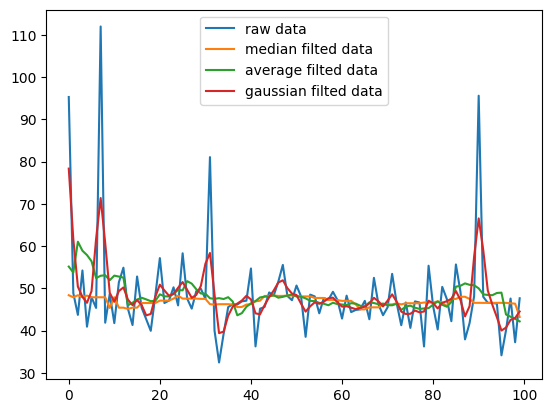

48.28129203578197
46.883210099372825


In [17]:
angle = 20
raw_data = np.load('Indoor_experiment_result/raw_angle_{}.npy'.format(angle))

def median_filter(signal, window_size=3):
    assert window_size % 2 == 1, "窗口大小必须是奇数"
    
    filtered_signal = np.zeros_like(signal)
    half_window = window_size // 2
    
    for i in range(half_window, len(signal) - half_window):
        window = signal[i - half_window:i + half_window + 1]
        filtered_signal[i] = np.median(window)
    
    # 处理边界情况
    for i in range(half_window):
        filtered_signal[i] = np.median(signal[:i + half_window + 1])
    for i in range(len(signal) - half_window, len(signal)):
        filtered_signal[i] = np.median(signal[i - half_window:])
    
    return filtered_signal


def average_filter(signal, window_size=3):
    assert window_size % 2 == 1, "窗口大小必须是奇数"
    
    filtered_signal = np.zeros_like(signal)
    half_window = window_size // 2
    
    for i in range(half_window, len(signal) - half_window):
        window = signal[i - half_window:i + half_window + 1]
        filtered_signal[i] = np.mean(window)
    
    # 处理边界情况
    for i in range(half_window):
        filtered_signal[i] = np.mean(signal[:i + half_window + 1])
    for i in range(len(signal) - half_window, len(signal)):
        filtered_signal[i] = np.mean(signal[i - half_window:])
    
    return filtered_signal

from scipy.ndimage.filters import gaussian_filter1d

def gaussian_filter(signal, sigma=1.0):
    filtered_signal = gaussian_filter1d(signal, sigma=sigma)
    return filtered_signal

median_filted_data = median_filter(raw_data, 11)
average_filted_data = average_filter(raw_data, 11)
gaussian_filted_data = gaussian_filter(raw_data, 1)
plt.figure()
plt.plot([i for i in range(len(raw_data))], raw_data, label='raw data')
plt.plot([i for i in range(len(raw_data))], median_filted_data, label='median filted data')
plt.plot([i for i in range(len(raw_data))], average_filted_data, label='average filted data')
plt.plot([i for i in range(len(raw_data))], gaussian_filted_data, label='gaussian filted data')
plt.legend()
plt.show()

print(np.mean(raw_data))
print(np.mean(median_filted_data))